<a href="https://colab.research.google.com/github/Samsonasumu/PYTHON-DATA-SCIENCE/blob/main/HP_EDA_linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/HP Business Analytics Dataset.xlsx")

In [ ]:
df.head()

,Organization Name,Organization Name URL,Headquarters Location,Industries,Last Funding Type,Last Funding Date,Last Funding Amount,Last Funding Amount Currency,Last Funding Amount Currency (in USD),Number of Employees,...,Price Currency,Company Type,Founded Date,Twitter,Facebook,LinkedIn,Funding Status,Acquisition Type,Announced Date,Estimated Revenue Range
0,Nexar,https://www.crunchbase.com/organization/nexar-2,"Tel Aviv, Tel Aviv, Israel","Apps, Autonomous Vehicles, Internet, Sensor, T...",Series C,2020-04-30,52000000.0,USD,52000000.0,101-250,...,NaN,For Profit,2015-01-01,http://twitter.com/getnexar,https://facebook.com/getnexar,https://www.linkedin.com/company/10460529,Late Stage Venture,NaN,NaT,Less than $1M
1,Medable,https://www.crunchbase.com/organization/medabl...,"Palo Alto, California, United States","Developer APIs, Health Care, Medical, Medical ...",Venture - Series Unknown,2020-05-04,25000000.0,USD,25000000.0,101-250,...,NaN,For Profit,2015-01-01,http://twitter.com/MedableInc,https://www.facebook.com/MedableInc/,https://www.linkedin.com/company/medable-inc-/,NaN,NaN,NaT,Less than $1M
2,Instabox,https://www.crunchbase.com/organization/instabox,"HÃ¤gersten, Stockholms Lan, Sweden","Logistics, Shipping, Supply Chain Management",Debt Financing,2020-04-08,23000000.0,EUR,24978252.0,101-250,...,NaN,For Profit,2015-01-01,NaN,https://www.facebook.com/instabox.se,https://www.linkedin.com/company/instabox-ab/,NaN,NaN,NaT,Less than $1M
3,Triller,https://www.crunchbase.com/organization/triller,"New York, New York, United States","Digital Media, Music, Social Network",Series B,2019-10-23,28000000.0,USD,28000000.0,11-50,...,NaN,For Profit,2015-01-01,https://twitter.com/triller,https://www.facebook.com/trillervids,https://www.linkedin.com/company/triller,Early Stage Venture,NaN,NaT,Less than $1M
4,OPSkins,https://www.crunchbase.com/organization/opskins,"Santa Monica, California, United States","E-Commerce, Gaming, Internet",Initial Coin Offering,2017-11-13,41000000.0,USD,41000000.0,11-50,...,NaN,For Profit,2015-01-01,https://twitter.com/opskinsgo,https://www.facebook.com/opskins,https://www.linkedin.com/company/opskins-com--...,NaN,NaN,NaT,Less than $1M


## EXPLORATORY DATA ANALYSIS

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(21528, 32)

In [ ]:
df.isna().sum()

Organization Name                             1
Organization Name URL                         0
Headquarters Location                      1980
Industries                                  168
Last Funding Type                          9055
Last Funding Date                          9055
Last Funding Amount                       11604
Last Funding Amount Currency              11604
Last Funding Amount Currency (in USD)     11604
Number of Employees                        1548
Total Funding Amount                      10490
Total Funding Amount Currency             10490
Total Funding Amount Currency (in USD)    10490
Number of Funding Rounds                   9055
Acquisition Status                        20462
Acquired by                               21164
Acquired by URL                           21164
Number of Acquisitions                    20797
Acquisition Price Currency (in USD)       21475
Number of Founders                         5409
Unnamed: 20                             

In [ ]:
# Below code gives percentage of null in every column
null_percentage = df.isnull().sum()/df.shape[0]*100

# Below code gives list of columns having more than 50% null
col_to_drop = null_percentage[null_percentage>50].keys()

output_df = df.drop(col_to_drop, axis=1)


In [ ]:
output_df.isnull().sum()

Organization Name                             1
Organization Name URL                         0
Headquarters Location                      1980
Industries                                  168
Last Funding Type                          9055
Last Funding Date                          9055
Number of Employees                        1548
Total Funding Amount                      10490
Total Funding Amount Currency             10490
Total Funding Amount Currency (in USD)    10490
Number of Funding Rounds                   9055
Number of Founders                         5409
Company Type                               5063
Founded Date                                  0
Twitter                                    4878
Facebook                                   5454
LinkedIn                                   5180
Estimated Revenue Range                       0
dtype: int64

In [ ]:
 output_df.head()

,Organization Name,Organization Name URL,Headquarters Location,Industries,Last Funding Type,Last Funding Date,Number of Employees,Total Funding Amount,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Number of Funding Rounds,Number of Founders,Company Type,Founded Date,Twitter,Facebook,LinkedIn,Estimated Revenue Range
0,Nexar,https://www.crunchbase.com/organization/nexar-2,"Tel Aviv, Tel Aviv, Israel","Apps, Autonomous Vehicles, Internet, Sensor, T...",Series C,2020-04-30,101-250,96500000.0,USD,96500000.0,4.0,2.0,For Profit,2015-01-01,http://twitter.com/getnexar,https://facebook.com/getnexar,https://www.linkedin.com/company/10460529,Less than $1M
1,Medable,https://www.crunchbase.com/organization/medabl...,"Palo Alto, California, United States","Developer APIs, Health Care, Medical, Medical ...",Venture - Series Unknown,2020-05-04,101-250,33202069.0,USD,33202069.0,3.0,3.0,For Profit,2015-01-01,http://twitter.com/MedableInc,https://www.facebook.com/MedableInc/,https://www.linkedin.com/company/medable-inc-/,Less than $1M
2,Instabox,https://www.crunchbase.com/organization/instabox,"HÃ¤gersten, Stockholms Lan, Sweden","Logistics, Shipping, Supply Chain Management",Debt Financing,2020-04-08,101-250,47057093.0,USD,47057093.0,5.0,3.0,For Profit,2015-01-01,NaN,https://www.facebook.com/instabox.se,https://www.linkedin.com/company/instabox-ab/,Less than $1M
3,Triller,https://www.crunchbase.com/organization/triller,"New York, New York, United States","Digital Media, Music, Social Network",Series B,2019-10-23,11-50,37500000.0,USD,37500000.0,4.0,2.0,For Profit,2015-01-01,https://twitter.com/triller,https://www.facebook.com/trillervids,https://www.linkedin.com/company/triller,Less than $1M
4,OPSkins,https://www.crunchbase.com/organization/opskins,"Santa Monica, California, United States","E-Commerce, Gaming, Internet",Initial Coin Offering,2017-11-13,11-50,41000000.0,USD,41000000.0,1.0,3.0,For Profit,2015-01-01,https://twitter.com/opskinsgo,https://www.facebook.com/opskins,https://www.linkedin.com/company/opskins-com--...,Less than $1M


In [ ]:
output_df.dtypes

Organization Name                                 object
Organization Name URL                             object
Headquarters Location                             object
Industries                                        object
Last Funding Type                                 object
Last Funding Date                         datetime64[ns]
Number of Employees                               object
Total Funding Amount                             float64
Total Funding Amount Currency                     object
Total Funding Amount Currency (in USD)           float64
Number of Funding Rounds                         float64
Number of Founders                               float64
Company Type                                      object
Founded Date                              datetime64[ns]
Twitter                                           object
Facebook                                          object
LinkedIn                                          object
Estimated Revenue Range        

In [ ]:
output_df = output_df.drop(columns=['Total Funding Amount Currency','Total Funding Amount'])

In [ ]:
output_df.head()

,Organization Name,Organization Name URL,Headquarters Location,Industries,Last Funding Type,Last Funding Date,Number of Employees,Total Funding Amount Currency (in USD),Number of Funding Rounds,Number of Founders,Company Type,Founded Date,Twitter,Facebook,LinkedIn,Estimated Revenue Range
0,Nexar,https://www.crunchbase.com/organization/nexar-2,"Tel Aviv, Tel Aviv, Israel","Apps, Autonomous Vehicles, Internet, Sensor, T...",Series C,2020-04-30,101-250,96500000.0,4.0,2.0,For Profit,2015-01-01,http://twitter.com/getnexar,https://facebook.com/getnexar,https://www.linkedin.com/company/10460529,Less than $1M
1,Medable,https://www.crunchbase.com/organization/medabl...,"Palo Alto, California, United States","Developer APIs, Health Care, Medical, Medical ...",Venture - Series Unknown,2020-05-04,101-250,33202069.0,3.0,3.0,For Profit,2015-01-01,http://twitter.com/MedableInc,https://www.facebook.com/MedableInc/,https://www.linkedin.com/company/medable-inc-/,Less than $1M
2,Instabox,https://www.crunchbase.com/organization/instabox,"HÃ¤gersten, Stockholms Lan, Sweden","Logistics, Shipping, Supply Chain Management",Debt Financing,2020-04-08,101-250,47057093.0,5.0,3.0,For Profit,2015-01-01,NaN,https://www.facebook.com/instabox.se,https://www.linkedin.com/company/instabox-ab/,Less than $1M
3,Triller,https://www.crunchbase.com/organization/triller,"New York, New York, United States","Digital Media, Music, Social Network",Series B,2019-10-23,11-50,37500000.0,4.0,2.0,For Profit,2015-01-01,https://twitter.com/triller,https://www.facebook.com/trillervids,https://www.linkedin.com/company/triller,Less than $1M
4,OPSkins,https://www.crunchbase.com/organization/opskins,"Santa Monica, California, United States","E-Commerce, Gaming, Internet",Initial Coin Offering,2017-11-13,11-50,41000000.0,1.0,3.0,For Profit,2015-01-01,https://twitter.com/opskinsgo,https://www.facebook.com/opskins,https://www.linkedin.com/company/opskins-com--...,Less than $1M


## SAVING CLEAN DATASET TO CSV FOR VISUALISATION ON TABLAEU

In [ ]:
output_df.to_csv("/content/drive/MyDrive/hpDataset_cleanForTablaeu.csv")


In [ ]:
output_df.duplicated().sum()

0

In [ ]:
df_numerics_only = output_df.select_dtypes(include=np.number)
df_numerics_only

,Total Funding Amount Currency (in USD),Number of Funding Rounds,Number of Founders
0,96500000.0,4.0,2.0
1,33202069.0,3.0,3.0
2,47057093.0,5.0,3.0
3,37500000.0,4.0,2.0
4,41000000.0,1.0,3.0
...,...,...,...
21523,NaN,NaN,1.0
21524,NaN,NaN,NaN
21525,NaN,NaN,NaN
21526,NaN,NaN,NaN


In [ ]:
df_numerics_only.isnull().sum()

Total Funding Amount Currency (in USD)    10490
Number of Funding Rounds                   9055
Number of Founders                         5409
dtype: int64

In [ ]:
mean_value=df_numerics_only['Total Funding Amount Currency (in USD)'].mean()
mean_rounds=df_numerics_only['Number of Funding Rounds'].mean()
mean_founders=df_numerics_only['Number of Founders'].mean()

In [ ]:
df_numerics_only['Total Funding Amount Currency (in USD)'].fillna(value=mean_value, inplace=True)
df_numerics_only['Number of Funding Rounds'].fillna(value=mean_rounds, inplace=True)
df_numerics_only['Number of Founders'].fillna(value=mean_founders, inplace=True)


In [ ]:
df_numerics_only.isnull().sum()

Total Funding Amount Currency (in USD)    0
Number of Funding Rounds                  0
Number of Founders                        0
dtype: int64

In [ ]:
df_numerics_only.describe()

,Total Funding Amount Currency (in USD),Number of Funding Rounds,Number of Founders
count,2.152800e+04,21528.000000,21528.000000
mean,1.967612e+07,2.309549,1.997829
std,6.787326e+07,1.126418,0.909245
min,1.000000e+03,1.000000,0.000000
25%,3.076233e+06,2.000000,1.000000
50%,1.967612e+07,2.309549,1.997829
75%,1.967612e+07,2.309549,2.000000
max,4.100000e+09,14.000000,10.000000


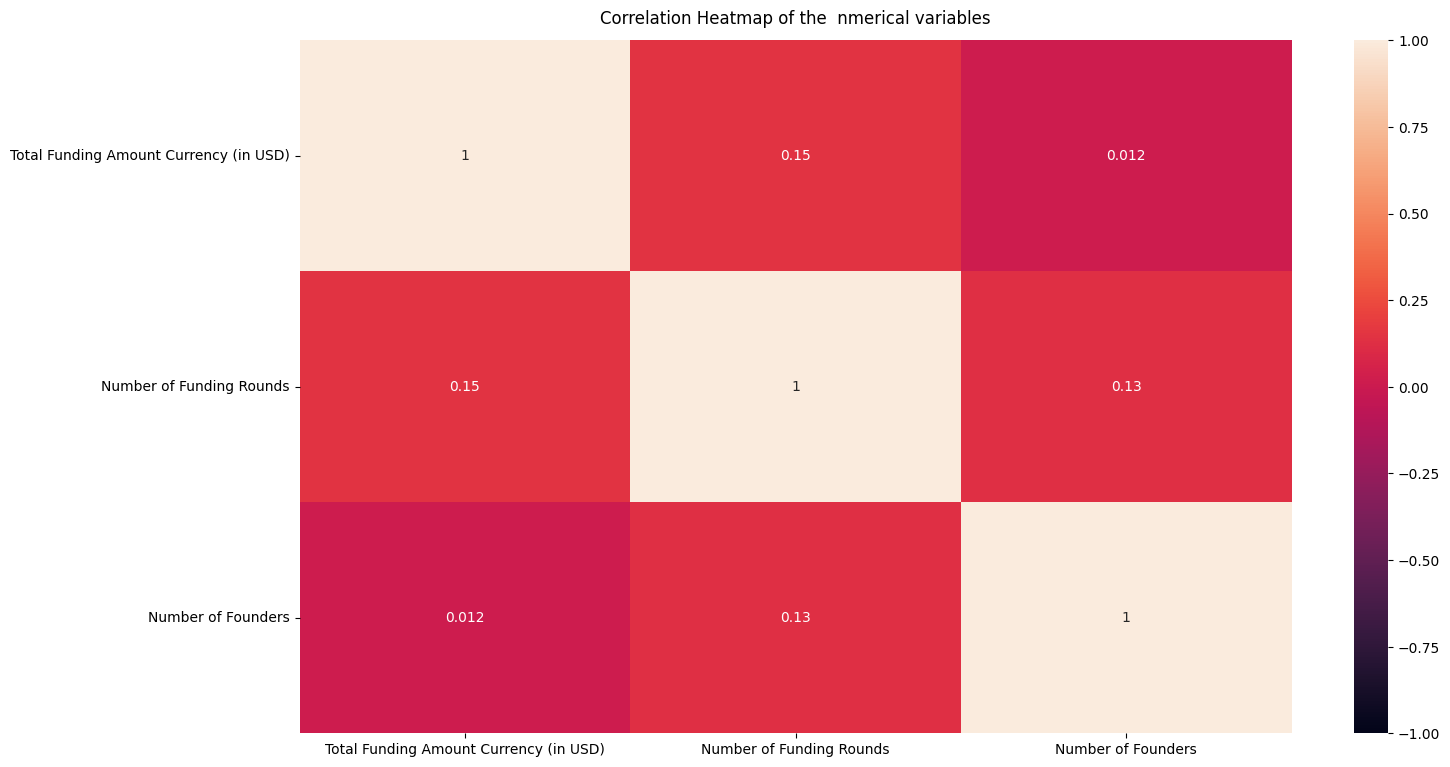

In [ ]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df_numerics_only.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap of the  nmerical variables', fontdict={'fontsize':12}, pad=12);

In [ ]:
df_numerics_only.columns

Index(['Total Funding Amount Currency (in USD)', 'Number of Funding Rounds',
       'Number of Founders'],
      dtype='object')

In [ ]:
X = df_numerics_only[['Number of Funding Rounds','Number of Founders']]
y = df_numerics_only['Total Funding Amount Currency (in USD)']

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
result=model.fit(X, y)
print(model.coef_)

[8933235.28913713 -577310.70231336]


In [ ]:
import statsmodels.api as sm
model1 = sm.OLS(df_numerics_only['Number of Founders'], df_numerics_only['Total Funding Amount Currency (in USD)'])
resul = model1.fit()
print(resul.summary())

                                 OLS Regression Results                                
Dep. Variable:     Number of Founders   R-squared (uncentered):                   0.067
Model:                            OLS   Adj. R-squared (uncentered):              0.067
Method:                 Least Squares   F-statistic:                              1537.
Date:                Mon, 16 Oct 2023   Prob (F-statistic):                        0.00
Time:                        11:08:52   Log-Likelihood:                         -46730.
No. Observations:               21528   AIC:                                  9.346e+04
Df Residuals:                   21527   BIC:                                  9.347e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------